---

# TP 6 : Optimization with and without constraints

<b>Sorbonne University</b><br>
Author : Marie Postel
---
$
\renewcommand{\R}{\mathbb{R}}
\newcommand{\eps}{\varepsilon}
$


In [1]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt

<a id="dim2"></a>
## Part 1: Where Are My Keys?

We are interested in geolocating an object equipped with a GPS tag, whose position is pinpointed by a network of sensors that can transmit their distance to the tag.
The simplified problem is then formulated as follows: in the plane, three sources are placed, as well as an object whose position is unknown.
The GPS provides us with distances, tainted with errors, between each source and the object.
The objective is to obtain a good approximation of the object's position in the plane, knowing the positions of the sources, the distances, and the errors.

We denote $s_1$, $s_2$, and $s_3$ as the positions of the three sources in $\mathbb{R}^2$, and $x^\star \in \mathbb{R}^2$ as the position of the unknown object.
The distances measured by the sources are denoted $d_1$, $d_2$, and $d_3$.
It can be shown that $x^\star$ minimizes the following function, defined on $\mathbb{R}^2$,
$$ \tilde{J}(x) = -(\|x-s_1\| - d_1)^2+ (\|x-s_2\| - d_2)^2+ (\|x-s_3\| - d_3)^2. $$

#### Question 1
First, we consider dimension 1, and we study the function $f: \mathbb{R} \rightarrow \mathbb{R}$
$$f(x)=(|x-s| - d)^2$$
What problem do we encounter if we try to minimize $f$ using a method seen in class?

=== BEGIN SOLUTION ===

The function $f$ is not differentiable everywhere on $\mathbb{R}$ (problem at 0), so optimization methods based on derivatives will not work correctly.

=== END SOLUTION ===

#### Question 2
For $s=0$ and $d=1$, plot the graph of the function $f$ on the interval $[-2,2]$, as well as the graph of the function
$$f_\mu(x) = (\sqrt{(x-s)^2 + \mu} - d)^2$$ for $\mu=0.1$, $0.01$, and $0.001$.
We will discretize the study interval with 1000 points. There should be a single figure with 4 curves, labeled with a legend.

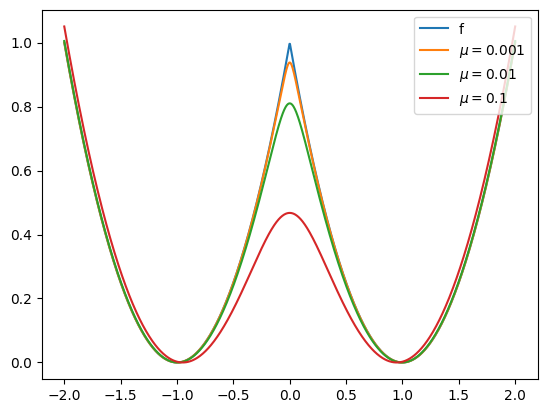

In [2]:
### BEGIN SOLUTION
def f(x):
    return (np.abs(x-s)-d)**2
def fmu(x,mu):
    return (np.sqrt((x-s)**2+mu)-d)**2
d=1
s=0
n=1000
x=np.linspace(-2,2,n)
plt.plot(x,f(x),label='f')
for mu in [0.001,0.01,0.1]:
    text="{}".format(mu)
    plt.plot(x,fmu(x,mu),label=r"$\mu=$"+text)
plt.legend()
### END SOLUTION
    

We return to our geolocation problem in the plane, which we now decide to approach by minimizing
J(x)=(∥x−s1∥2+μ−d1)2+(∥x−s2∥2+μ−d2)2+(∥x−s3∥2+μ−d3)2,J(x)=(∥x−s1​∥2+μ
​−d1​)2+(∥x−s2​∥2+μ
​−d2​)2+(∥x−s3​∥2+μ

​−d3​)2,
using a gradient descent method.

To simplify, we assume that all 3 sensors have the same margin of error.

Here, $x$, $s_1$, $s_2$, and $s_3 \in \mathbb{R}^2$, so $J: \mathbb{R}^2 \rightarrow \mathbb{R}$. Recall that $|v|^2=\sum_{i=1}^2v_i^2$.

Answer the following questions on the provided sheet: <br>
What is the derivative of $y\rightarrow \sqrt{y}$, for $y\in \mathbb{R}^{+*}$? <br>
For $x\in\mathbb{R}^2$, $s\in\mathbb{R}^2$, $d$, and $\mu\in\mathbb{R}$, compute the gradients of the following functions: <br>
$x\rightarrow \|x\|^2 $ <br>
$x\rightarrow \|x-s\|^2 $ with $x\in\mathbb{R}^2$ <br>
$x\rightarrow \sqrt{\|x-s\|^2+\mu} $ with $x\in\mathbb{R}^2$ <br>
$x\rightarrow (\sqrt{\|x-s\|^2+\mu}-d)^2 $ with $x\in\mathbb{R}^2$ <br>


=== BEGIN SOLUTION ===
$$(\sqrt{y})'=\dfrac{1}{2\sqrt{y}},\quad y\in \mathbb{R}^{+*},$$
$$f:x\rightarrow \|x\|^2,\quad \nabla f(x)=2x,$$
$$f:x\rightarrow \|x-s\|^2,\quad \nabla f(x)=2(x-s),$$
$$f:x\rightarrow \sqrt{\|x-s\|^2+\mu},\quad \nabla f(x)=\dfrac{(x-s)}{\sqrt{\|x-s\|^2+\mu}},$$
$$f:x\rightarrow (\sqrt{\|x-s\|^2+\mu}-d)^2,\quad \nabla f(x)=2\dfrac{(x-s)(\sqrt{\|x-s\|^2+\mu}-d)}{\sqrt{\|x-s\|^2+\mu}}$$
=== END SOLUTION ===

#### Question 3
In the following cell, define the function $J(x)$ and its gradient $gJ(x)$. This function should return a numpy array of the same dimensions as $x$. Do not modify the given values for $\mu$, $(s_i,d_i)_{i=1,2,3}$.

In [3]:
mu=0.0001
s1=np.array([-1,1])
s2=np.array([2,1])
s3=np.array([1,-3])
d1,d2,d3=(1.4,2.3,3.)
d1,d2,d3=(1.41,2.23,3.16)

### BEGIN SOLUTION
data=[[s1,d1],[s2,d2],[s3,d3]]

def J(x):
    return ((np.linalg.norm(x-s1)**2+mu)**0.5-d1)**2+((np.linalg.norm(x-s2)**2+mu)**0.5-d2)**2+((np.linalg.norm(x-s3)**2+mu)**0.5-d3)**2

def gJ(x):
    g=np.zeros(2)
    for dat in data:
        nn=(np.linalg.norm(x-dat[0])**2+mu)**0.5
        g=g+2*(x-dat[0])*(nn-dat[1])/nn
    return g
    
### END SOLUTION


Check your code by displaying the values of $J(x)$ and $gJ(x)$ for $x=\begin{pmatrix}1\\2\end{pmatrix}$.

Note: There is nothing to add in the following two cells, just execute them. If they give an error, correct your functions $J$ and/or $gJ$.

In [4]:
#### Question 4.1
x=np.array([1,2])
print(J(x))
Jx=4.73351187568691
assert J(x)==Jx, "Your function J does not compute the right vakue"


4.73351187568691


In [5]:
#### Question 4.2
print(gJ(x))
gJx=np.array([2.63135795, 3.26526551])
if not isinstance(gJ(x), np.ndarray):
    print("your gJ(x) function does not return a numpy array")
assert len(gJ(x))==2, "your gJ(x) function returns an array that does not have the same dimension as x"
assert np.linalg.norm(gJ(x)-gJx)<1.e-6 , "your gJ function does not return the correct values"


[2.63135795 3.26526551]


#### Question 5
In the following cell, minimize $J(x)$ using constant step size gradient descent.
Display the solution, the gradient of the function at this point, and the number of iterations.

In [6]:
### BEGIN SOLUTION
def descent_grad(x0,alpha,eps,gradf,Nmax):
    # x0: initialization
    # alpha: step size
    # eps: precision. Find a stopping criterion
    # gradf: gradient function
    # Nmax: maximum number of iterations
    x=x0
    n=0
    gg=gradf(x)
    while np.linalg.norm(gg)>eps and n<Nmax:
        x=x-alpha*gg
        gg=gradf(x)
        n=n+1
    return x,n,np.linalg.norm(gg)
x0=np.zeros(2)
alpha=.1
eps=1e-10
Nmax=1000
x,n,gg=descent_grad(x0,alpha,eps,gJ,Nmax)
print(x,n,gg)
### END SOLUTION

[0.0031052  0.00299058] 75 8.640918144747907e-11


#### Question 6
Display on a graph the three sources $s_1$, $s_2$, and $s_3$ with blue circles and the found target $x^*$ with a red cross.

distance of the target to the source 0=1.414301178762019 data 1.41
distance of the target to the source 1=2.231953540927002 data 2.23
distance of the target to the source 2=3.164135218508435 data 3.16


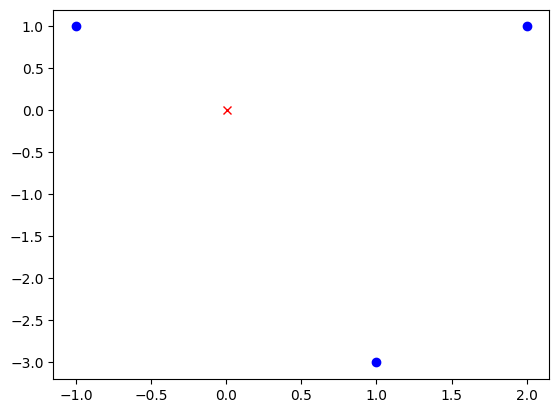

In [7]:
### BEGIN SOLUTION
for   k,dat in enumerate(data):
    plt.plot(dat[0][0],dat[0][1],"ob",label="s{}".format(k))
    print("distance of the target to the source {}={} data {}".format(k,np.linalg.norm(x-dat[0]),dat[1]))
plt.plot(x[0],x[1],"xr",label="x")
### END SOLUTION

<a id="dim2"></a>
## Partie 2 : Optimization with constraints

Let $A$ be a real matrix with $p$ rows and $n$ columns, of rank equal to $n$ (we assume $p>n$).
Let $b\in \mathbb{R}^p$ and $x\in\mathbb{R}^n$. We  define $$f(x) = ||Ax-b||^2.
$$



#### Question 1
<ol>
<li> Recall  the expression of the minimum of  $f$  without constraints</li>
</ol>

=== BEGIN SOLUTION ===

The global minimum of $f$ is the vector for which the gradient is null  $\nabla f(x)=2A^T(Ax-b)$ i.e. $$x^\star=(A^tA)^{-1}A^Tb$$.

=== END SOLUTION ===

#### Question 2
Define the following data in  numpy arrays
$$A=\begin{pmatrix}2  & 1 \\
1& 2 \\
0 & 1 \\
1 & 0\end{pmatrix},\quad b=\begin{pmatrix}1\\2\\3\\4\end{pmatrix}.$$

In [8]:
### BEGIN SOLUTION
A=np.array([[2,1],[1,2],[0,1],[1,0]])
b=np.array([1,2,3,4])
### END SOLUTION

#### Question 3
Compute the global minimum $xs$ of $f$ by solving a linear system

In [9]:
### BEGIN SOLUTION
xs=np.linalg.solve(A.T.dot(A),A.T.dot(b))
### END SOLUTION
print(xs)

[0.8 0.8]


In [10]:
if not isinstance(xs, np.ndarray):
    print("your solution is not a numpy array")
assert len(xs)==2, "your solution does not have the correct dimension"
assert np.linalg.norm(xs-np.array([0.8,0.8]))<1.e-6 , "your solution is incorrect"


#### Question 4
Program the function  $f$ 

In [11]:
### BEGIN SOLUTION
def f(x):
    return np.linalg.norm(A.dot(x)-b)**2
### END SOLUTION

#### Question 5 
Plot the contour lines of $f$ using the following code.
Add the global minimum $xs$ with a red cross.

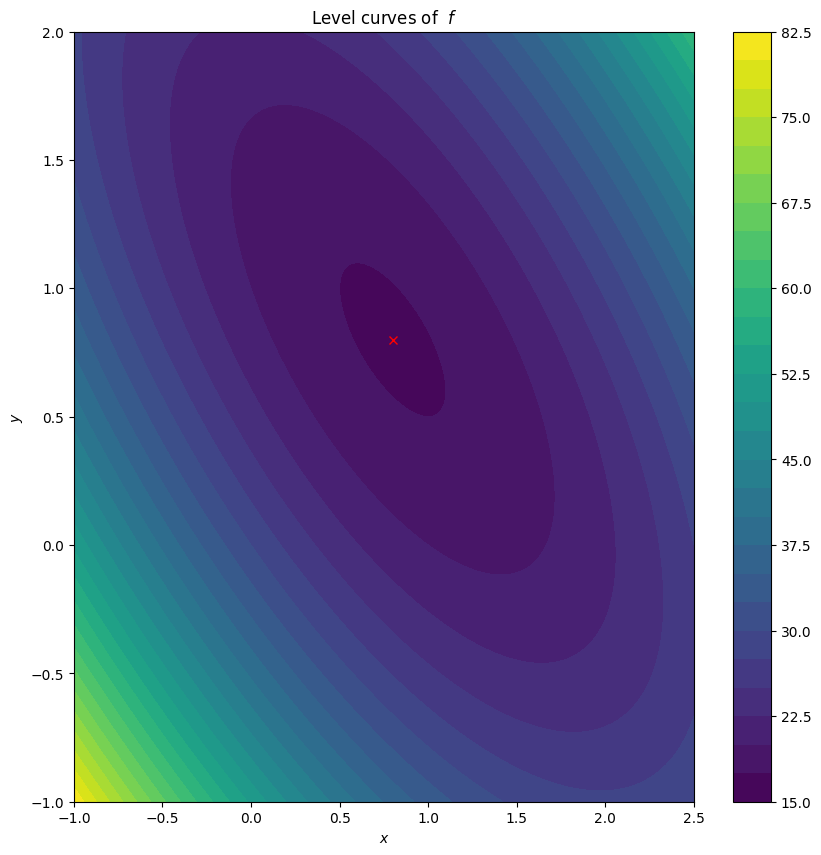

In [12]:
# Graphique
xx = np.linspace(-1,2.5,200)
yy = np.linspace(-1,2,200)
xx,yy = np.meshgrid(xx,yy)
zz = np.zeros(xx.shape)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        zz[i,j] = f(np.array([xx[i,j],yy[i,j]]))
        
plt.figure(figsize=[10,10])
plt.title("Level curves of  $f$")
plt.xlabel("$x$")
plt.ylabel("$y$")

# Tracé de f
plt.contourf(xx,yy,zz,levels=30)
plt.colorbar()
### BEGIN SOLUTION
plt.plot(xs[0],xs[1],'rx')
### END SOLUTION


#### Question 6
For $c\in \mathbb{R}^n$ and $x\in \mathbb{R}^n$, consider the problem (P): Minimize $f(x)$
subject to the constraint $c^Tx=0$.

On paper:
<ol>
<li> Give the expression of the Lagrangian associated with (P).
<li> Give the expression of the gradient of the Lagrangian associated with (P).
<li> Write the optimality conditions using the theorem of constrained extrema.

    Hint: first express $x^*$ in terms of $\lambda^*$. 
    
    Calculate $\lambda^*$, then reinsert it into the expression of $x^*$.
</ol>

=== BEGIN SOLUTION ===
The Lagrangian of the constrained problem $c\cdot x=0$ is
$$\ell(x,z)=\|Ax-b\|^2+\lambda c\cdot x.$$
Its gradient is
$$\nabla_x \ell(x,z)=2A^T(Ax-b)+\lambda c.$$
The theorem of constrained extrema states:
$$2A^T(Ax^\star-b)+\lambda^\star c=0.$$
We obtain $x^\star$ in terms of $\lambda^\star$
$$x^\star=\frac{1}{2}(A^TA)^{-1}(2A^Tb-\lambda^\star c),$$

Hence, by injecting into the constraint $ c\cdot x^\star=0$
$$(A^TA)^{-1}(-\lambda^\star c+2A^Tb)\cdot c=0.$$

From this, we derive
$$\lambda^\star=2\dfrac{((A^TA)^{-1}A^Tb)\cdot c}{(A^TA)^{-1}c\cdot c},$$
then
$$x^\star=\frac{1}{2}(A^TA)^{-1}(2A^Tb-\lambda^\star c).$$
=== END SOLUTION ===

#### Question 7
For $$c=\begin{pmatrix}1\\2\end{pmatrix},$$ program the calculation of the minimum $x^*$ of $f$ subject to the constraint $c\cdot x=0$. Display the values of $\lambda^*$ and $x^*$.
Exceptionally, if necessary, you can calculate the inverse of a matrix using the function $numpy.linalg.inv$.

In [13]:
### BEGIN SOLUTION
c=np.array([1,2])
M=np.linalg.inv(A.T.dot(A))
lam=2*M.dot(A.T.dot(b)).dot(c)/(np.dot(M,c).dot(c))
xc=0.5*M.dot(2*A.T.dot(b)-lam*c)
print("lambda=",lam," x=",xc)
### END SOLUTION


lambda= 6.857142857142856  x= [ 1.14285714 -0.57142857]


#### Question 8
Duplicate the graph from question 5 and add to it:
* $x^*$ with a yellow star.
* the line with equation $c\cdot x=0$ in white.


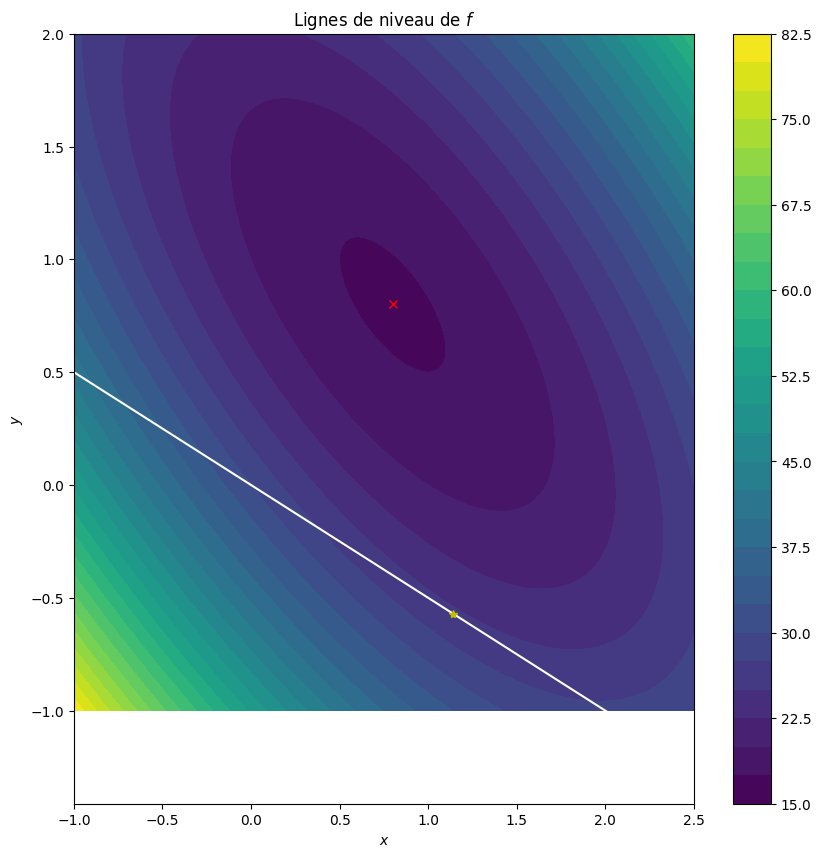

In [14]:
### BEGIN SOLUTION
xx = np.linspace(-1,2.5,200)
yy = np.linspace(-1,2,200)
xx,yy = np.meshgrid(xx,yy)
zz = np.zeros(xx.shape)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        zz[i,j] = f(np.array([xx[i,j],yy[i,j]]))
        
plt.figure(figsize=[10,10])
plt.title("Lignes de niveau de $f$")
plt.xlabel("$x$")
plt.ylabel("$y$")

# Tracé de f
plt.contourf(xx,yy,zz,levels=30)
plt.colorbar()
plt.plot(xs[0],xs[1],'rx')
xa=np.array([-1,2.5])
ya=-xa*c[0]/c[1]
plt.plot(xa,ya,'w-')
plt.plot(xc[0],xc[1],'*y')
### END SOLUTION
